In [3]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.odr.odrpack as odrpack
from IPython.display import clear_output

In [4]:
import random
import numpy as np
import scipy.stats as st

class DifferencingDecisionModel:
    
    def __init__(self):
        pass
        
    def convert_k_to_p(self, d_prime, k1, k2):
        
        p_k1_false = st.norm.cdf(-k1)
        p_k2_false = st.norm.cdf(-k2)
        p_false = p_k1_false + p_k2_false
        
        p_k1_hit = st.norm.cdf(-d_prime - k1) + st.norm.cdf(d_prime - k1)
        p_k2_hit = st.norm.cdf(-d_prime - k2) + st.norm.cdf(d_prime - k2)
        p_hit = (p_k1_hit + p_k2_hit)/2
        
        return p_false, p_hit
        
    def convert_k_to_z(self, d_prime, k1, k2):
        
        p_false, p_hit = self.convert_k_to_p(d_prime, k1, k2)
        return st.norm.ppf(p_false), st.norm.ppf(p_hit)
        
    def sample_k1_k2_values_to_z(self, k_range, d_prime, num_points):
        
        # DF2
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            k2 = random.choice(k_range)
            while k2 < -k1:
                k2 = random.choice(k_range)
            
            z_f, z_h = self.convert_k_to_z(d_prime, k1, k2)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k1_k2_values_to_p(self, k_range, d_prime, num_points):
        
        # DF2
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            k2 = random.choice(k_range)
            while k2 < -k1:
                k2 = random.choice(k_range)
            
            p_f, p_h = self.convert_k_to_p(d_prime, k1, k2)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
    def sample_k_values_to_z(self, k_range, d_prime, num_points):
        
        # DF1
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            z_f, z_h = self.convert_k_to_z(d_prime, k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k_values_to_p(self, k_range, d_prime, num_points):
        
        # DF1
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            p_f, p_h = self.convert_k_to_p(d_prime, k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
        
    def get_k_values_to_z(self, k_range, d_prime):
        
        # DF1
        zf_vals = []
        zh_vals = []
        
        for k in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']):
            if k == 0:
                continue
            z_f, z_h = self.convert_k_to_z(d_prime, k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def get_k_values_to_p(self, k_range, d_prime):
        
        # DF1
        pf_vals = []
        ph_vals = []
        
        for k in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num']):
            if k == 0:
                continue
            p_f, p_h = self.convert_k_to_p(d_prime, k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
        
diff_model = DifferencingDecisionModel()

# DF2 k-Value Grid Sampling

Text(0.5, 1.0, "DF2 k-Sampling (d'=0.5, 0<k<4)")

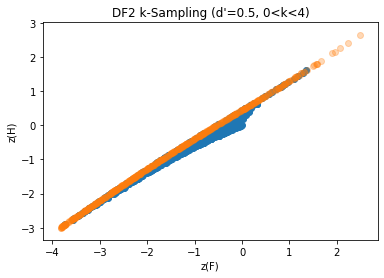

In [9]:
k_range = {'k_min': 0, 'k_max': 4, 'k_num': 1000}
zf_vals, zh_vals = diff_model.sample_k1_k2_values_to_z(k_range, 1, 500)
zf_vals_k, zh_vals_k = diff_model.sample_k_values_to_z(k_range, 1, 500)

plt.scatter(zf_vals, zh_vals)
plt.scatter(zf_vals_k, zh_vals_k, alpha=0.3)
plt.xlabel('z(F)')
plt.ylabel('z(H)')
plt.title('DF2 k-Sampling (d\'=0.5, 0<k<4)')
#plt.savefig('results/df2_sampling_smallk.png')

In [15]:
# DF1/DF2 k-sampling using subject slope-intercept data

k_range = {'k_min': 0, 'k_max': 4, 'k_num': 101}
dp_range = {'dp_min': 0, 'dp_max': 2, 'dp_num': 11}

mb_data = pd.read_csv('data/mb_data.csv', index_col=0)
x_vals = [-4, 3]

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zf_vals, zh_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, 500)
    zf_vals_k, zh_vals_k = diff_model.sample_k_values_to_z(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zf_vals, zh_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='DF2')
    plt.scatter(zf_vals_k, zh_vals_k, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='DF1')
    for index, row in mb_data.iterrows():
        slope, intercept = row['Slope'], row['Intercept']
        pred_vals = [slope * n + intercept for n in x_vals]
        plt.plot(x_vals, pred_vals, color='black', alpha=0.1)
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 3)
    plt.ylim(-4, 3)
    plt.title(f'DF k-Value Sampling (d\'={round(dp,2)}, 0<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()

In [11]:
# DF2 k-sampling w/ subject z-value data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/z_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['BYZ','HP','HYP','SL','YPL','YJC','ZJT','QP','TCD','YCX','ZXL','ZY','CW','WJ','RSL','SJ2','LXL','SYB','WY','YJX','CY','GJ','JYN','SJ','SXQ','ZQT']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zf_vals, zh_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, 1000)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zf_vals, zh_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'] in explained_subs:
            alpha = 0.3
            zf_vals = sub_data.filter(like='ZF').tolist()
            zh_vals = sub_data.filter(like='ZH').tolist()
            plt.plot(zf_vals, zh_vals, color='black', alpha=alpha)    
    
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 3)
    plt.ylim(-4, 3)
    plt.title(f'DF2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

In [18]:
# DF2 k-sampling w/ subject p-value data

k_range = {'k_min': 0, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 26}

data = pd.read_csv('data/p_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['BYZ','HP','HYP','SL','YPL','YJC','ZJT','QP','TCD','YCX','ZXL','ZY','CW','WJ','RSL','SJ2','LXL','SYB','WY','YJX','CY','GJ','JYN','SJ','SXQ','ZQT']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    pf_vals, ph_vals = diff_model.sample_k1_k2_values_to_p(k_range, dp, 1000)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(pf_vals, ph_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'].replace('\'', "") in explained_subs:
            alpha = 0.3
            pf_vals = sub_data.filter(like='PF').tolist()
            ph_vals = sub_data.filter(like='PH').tolist()
            plt.plot(pf_vals, ph_vals, color='black', alpha=alpha)    
    
    plt.xlabel('p(F)')
    plt.ylabel('p(H)')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f'DF2 k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

# Fixed Parameter Plots

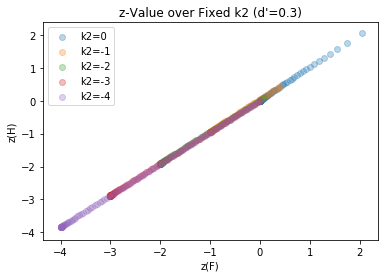

In [67]:
k1_range = {'k_min': 0, 'k_max': 5, 'k_num': 100}
data_zf = []
data_zh = []
for k2 in range(5):
    k_data_zf = []
    k_data_zh = []
    for k1 in np.linspace(k1_range['k_min'], k1_range['k_max'], k1_range['k_num']):
        zf,zh = diff_model.convert_k_to_z(0.3, k1, k2)
        k_data_zf.append(zf)
        k_data_zh.append(zh)
        
    data_zf.append(k_data_zf)
    data_zh.append(k_data_zh)

for i in range(len(data_zf)):
    plt.scatter(data_zf[i], data_zh[i], label=f'k2={-i}', alpha=0.3)
plt.xlabel('z(F)')
plt.ylabel('z(H)')
plt.title('z-Value over Fixed k2 (d\'=0.3)')
plt.legend()
plt.savefig('results/z_fixedk2_smalldp.png')

In [116]:
k1_range = {'k_min': 0, 'k_max': 4, 'k_num': 101}
dp_range = {'dp_min': 0, 'dp_max': 2, 'dp_num': 11}

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    data_zf = []
    data_zh = []
    for k2 in range(0, 5):
        k_data_zf = []
        k_data_zh = []
        for k1 in np.linspace(k1_range['k_min'], k1_range['k_max'], k1_range['k_num']):
            zf,zh = diff_model.convert_k_to_z(dp, k1, k2)
            k_data_zf.append(zf)
            k_data_zh.append(zh)
            
        k_data_zf = [n for n in k_data_zf if abs(n) != np.inf]
        k_data_zh = [n for n in k_data_zh if abs(n) != np.inf]
        data_zf.append(k_data_zf)
        data_zh.append(k_data_zh)

    for i in range(len(data_zf)):
        model = linregress(data_zf[i], data_zh[i])
        plt.scatter(data_zf[i], data_zh[i], alpha=0.3, label=f'k2={-i}: y={round(model.intercept,3)}+{round(model.slope, 3)}x')
    plt.gcf().set_size_inches(8, 6)
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.title(f'z-Value over Fixed d\' (d\'={round(dp,2)})')
    plt.legend()
    plt.savefig(f'results/z_fixeddp{round(dp,2)}.png')
    plt.clf()

<Figure size 576x432 with 0 Axes>

In [114]:
k1_range = {'k_min': 0, 'k_max': 5, 'k_num': 100}
dp_range = {'dp_min': 0, 'dp_max': 2, 'dp_num': 11}

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    data_pf = []
    data_ph = []
    for k2 in range(0, 5):
        k_data_pf = []
        k_data_ph = []
        for k1 in np.linspace(k1_range['k_min'], k1_range['k_max'], k1_range['k_num']):
            pf,ph = diff_model.convert_k_to_p(dp, k1, k2)
            k_data_pf.append(pf)
            k_data_ph.append(ph)
            
        k_data_pf = [n for n in k_data_pf if abs(n) != np.inf]
        k_data_ph = [n for n in k_data_ph if abs(n) != np.inf]
        data_pf.append(k_data_pf)
        data_ph.append(k_data_ph)

    for i in range(len(data_pf)):
        model = linregress(data_pf[i], data_ph[i])
        plt.scatter(data_pf[i], data_ph[i], alpha=0.3, label=f'k2={-i}: y={round(model.intercept,3)}+{round(model.slope, 3)}x')
    plt.gcf().set_size_inches(8, 6)
    plt.xlabel('p(F)')
    plt.ylabel('p(H)')
    plt.title(f'p-Value over Fixed d\' (d\'={round(dp,2)})')
    plt.legend()
    plt.savefig(f'results/p_fixeddp{round(dp,2)}.png')
    plt.clf()

<Figure size 576x432 with 0 Axes>

# Analyzing DF1 ROC Fit

In [5]:
def distance(point, coef):
    return abs((coef[0]*point[0])-point[1]+coef[1])/math.sqrt((coef[0]*coef[0])+1)

def p4(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    dx, dy = x2-x1, y2-y1
    det = dx*dx + dy*dy
    a = (dy*(y3-y1)+dx*(x3-x1))/det
    return x1+a*dx, y1+a*dy

def f(B, x):
    return B[0]*x + B[1]
linear = odrpack.Model(f)

In [6]:
k_range = {'k_min': 0, 'k_max': 4, 'k_num': 201}
dp_range = {'dp_min': 0, 'dp_max': 2.5, 'dp_num': 101}

z_data = pd.read_csv('data/z_data.csv', index_col=0)
p_data = pd.read_csv('data/p_data.csv', index_col=0)
p_data['Subject'] = p_data['Subject'].str.replace('\'', '')
x_vals = [-5, 5]
explained_subs = ['CSF','LT','ZBY','DLC','HMH','GAX','LMT','PC','SZJ','WYX','ZJ']

for i in range(len(z_data)):
    
    z_sub_data = z_data.iloc[i]
    subject = z_sub_data['Subject'].replace('\'', "")

    if subject in explained_subs:    

        # Unpack subject data
        zf_vals = [n for n in z_sub_data.filter(like='ZF').tolist() if n != 0]
        zh_vals = [n for n in z_sub_data.filter(like='ZH').tolist() if n != 0]
        pf_vals = [st.norm.cdf(z) for z in zf_vals]
        ph_vals = [st.norm.cdf(z) for z in zh_vals]

        # Find subject TLS regression line
        odr_data = odrpack.RealData(zf_vals, zh_vals)
        odr = odrpack.ODR(odr_data, linear, beta0=[1., 1.])
        subject_slope, subject_intercept = odr.run().beta
        print(f'{subject} TLS slope: {subject_slope}')
        
        coef = [subject_slope, subject_intercept]
        
        # Find d' that yields closest fitting z-ROC
        lowest_tls = np.inf
        best_dp = 0
        for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
            zfm_vals, zhm_vals = diff_model.get_k_values_to_z(k_range, dp)
            zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
            zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
            zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
            
            if len(zfm_vals) < 2:
                continue
            
            tls = np.sum([distance([f, h], coef) for f, h in zip(zfm_vals, zhm_vals)])

            if tls < lowest_tls:
                lowest_tls = tls
                best_dp = dp

        # Calculate R^2
        p1 = (-5, subject_intercept + subject_slope * -5)
        p2 = (5, subject_intercept + subject_slope * 5)
        zfm_vals, zhm_vals = diff_model.get_k_values_to_z(k_range, best_dp)
        zfm_vals_new = [zfm_vals[i] for i in range(len(zfm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
        zhm_vals_new = [zhm_vals[i] for i in range(len(zhm_vals)) if zfm_vals[i] <= 1.2*max(zf_vals) and zhm_vals[i] <= 1.2*max(zh_vals) and zfm_vals[i] >= 1.2*min(zf_vals) and zhm_vals[i] >= 1.2*min(zh_vals)]
        zfm_vals, zhm_vals = zfm_vals_new, zhm_vals_new
        ssr = np.sum([(mx - p4(p1, p2, (mx, my))[0])**2 + (my - p4(p1, p2, (mx, my))[1])**2 for mx, my in zip(zfm_vals, zhm_vals)])
        sst = np.sum([(mx - np.mean(zfm_vals))**2 + (my - np.mean(zhm_vals))**2 for mx, my in zip(zfm_vals, zhm_vals)])
        r_squared = round(1 - ssr/sst, 3)
        
        print(f"TLS value: {lowest_tls}\tR^2: {r_squared}")
        
        # Plot z-ROC
        plt.gcf().set_size_inches(8, 6)
        y_pred = [subject_intercept + subject_slope * n for n in x_vals]
        plt.plot(zf_vals, zh_vals, color='black', label='Human Data')
        zfm_vals, zhm_vals = diff_model.get_k_values_to_z(k_range, best_dp)
        plt.plot(x_vals, y_pred, color='black', linestyle='--', alpha=0.2, label=f'Human ROC: y={round(subject_intercept, 3)}+{round(subject_slope, 3)}x')
        plt.plot(zfm_vals, zhm_vals, color='black', alpha=0.5, label='Model ROC')

        plt.xlabel('z(F)')
        plt.ylabel('z(H)')
        plt.xlim(-4, 3)
        plt.ylim(-4, 3)
        subject_acc = round(z_sub_data['Accuracy'], 3)
        model_acc = round((st.norm.cdf(best_dp/2))**2 + (st.norm.cdf(-best_dp/2))**2, 3)
        plt.title(f'DF1 Subject {subject} ROC Fitting (d\'={round(best_dp,3)})\nR^2={r_squared}\nSubject Accuracy: {subject_acc}    Model Accuracy: {model_acc}')
        plt.legend()
        plt.savefig(f'results/output/df1_zmodel_{subject}.png')
        plt.clf()
        
        # Plot p-ROC
        plt.gcf().set_size_inches(8, 6)
        plt.plot(pf_vals, ph_vals, color='black', label='Human Data')
        temp_x = np.linspace(-4, 3, 26)
        y_pred = [subject_intercept + subject_slope * n for n in temp_x]
        temp_x = [st.norm.cdf(val) for val in temp_x]
        y_pred = [st.norm.cdf(val) for val in y_pred]
        plt.plot(temp_x, y_pred, color='black', linestyle='--', alpha=0.2, label='Human ROC')
        pfm_vals, phm_vals = diff_model.get_k_values_to_p(k_range, best_dp)
        plt.plot(pfm_vals, phm_vals, color='black', alpha=0.5, label='Model ROC')
        
        plt.xlabel('p(F)')
        plt.ylabel('p(H)')
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.title(f'DF1 Subject {subject} ROC Fitting (d\'={round(best_dp,3)})\nR^2={r_squared}\nSubject Accuracy: {subject_acc}    Model Accuracy: {model_acc}')
        plt.legend()
        plt.savefig(f'results/output/df1_pmodel_{subject}.png')
        plt.clf()


CSF TLS slope: 1.0028619619006445
TLS value: 12.265607189379818	R^2: 0.996
LT TLS slope: 0.905964790070835
TLS value: 7.40585149095371	R^2: 0.998
ZBY TLS slope: 0.8016524510555929
TLS value: 1.5630520173557965	R^2: 1.0
DLC TLS slope: 1.0277976800645598
TLS value: 2.5742410931097552	R^2: 0.999
GAX TLS slope: 1.1368243854933529
TLS value: 28.958201301622204	R^2: 0.987
HMH TLS slope: 1.0062878358531209
TLS value: 2.9650937458944995	R^2: 0.999
LMT TLS slope: 1.045244291738568
TLS value: 14.282878785591631	R^2: 0.997
PC TLS slope: 0.9450103493481479
TLS value: 1.298816138709779	R^2: 1.0
SZJ TLS slope: 1.010588634237981
TLS value: 2.7393059169859355	R^2: 0.997
WYX TLS slope: 1.16648171357917
TLS value: 16.089746490061565	R^2: 0.985
ZJ TLS slope: 1.0048930538391838
TLS value: 1.2134311960497974	R^2: 1.0


<Figure size 576x432 with 0 Axes>